In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import collections
import random
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle

In [2]:
# Download caption annotation files

annotation_folder = '/annotations/'
if not os.path.exists(os.path.abspath('.')+annotation_folder):
    annotation_zip = tf.keras.utils.get_file('captions.zip',
                                              cache_subdir=os.path.abspath('.'),
                                              origin = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                              extract=True)
    annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
    os.remove(annotation_zip)

# Download image files from train 2014

image_folder = '/train2014/'
if not os.path.exists(os.path.abspath('.')+image_folder):
    image_zip = tf.keras.utils.get_file('train2014.zip',
                                        cache_subdir=os.path.abspath('.'),
                                        origin='http://images.cocodataset.org/zips/train2014.zip',
                                        extract=True)
    PATH_TRAIN = os.path.dirname(image_zip) + image_folder
    os.remove(image_zip)
else:
    PATH_TRAIN = os.path.abspath('.')+image_folder

In [3]:
# Download image files from valid 2014

image_folder = '/val2014/'
if not os.path.exists(os.path.abspath('.')+image_folder):
    image_zip = tf.keras.utils.get_file('val2014.zip',
                                        cache_subdir=os.path.abspath('.'),
                                        origin='http://images.cocodataset.org/zips/val2014.zip',
                                        extract=True)
    PATH_VAL = os.path.dirname(image_zip) + image_folder
    os.remove(image_zip)
else:
    PATH_VAL = os.path.abspath('.')+image_folder

In [4]:
image_folder = '/test2014/'
if not os.path.exists(os.path.abspath('.')+image_folder):
    image_zip = tf.keras.utils.get_file('test2014.zip',
                                        cache_subdir=os.path.abspath('.'),
                                        origin='http://images.cocodataset.org/zips/test2014.zip',
                                        extract=True)
    PATH_TEST = os.path.dirname(image_zip) + image_folder
    os.remove(image_zip)
else:
    PATH_TEST = os.path.abspath('.')+image_folder

In [5]:
annotation_file = 'annotations/captions_train2014.json'
PATH_TRAIN = 'train2014/'
PATH_VAL = 'valid2014/'
PATH_TEST = 'test2014/'

with open(annotation_file, 'r') as f:
    annotations = json.load(f)
annotations.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [6]:
annotations['annotations'][:20]

[{'image_id': 318556,
  'id': 48,
  'caption': 'A very clean and well decorated empty bathroom'},
 {'image_id': 116100,
  'id': 67,
  'caption': 'A panoramic view of a kitchen and all of its appliances.'},
 {'image_id': 318556,
  'id': 126,
  'caption': 'A blue and white bathroom with butterfly themed wall tiles.'},
 {'image_id': 116100,
  'id': 148,
  'caption': 'A panoramic photo of a kitchen and dining room'},
 {'image_id': 379340,
  'id': 173,
  'caption': 'A graffiti-ed stop sign across the street from a red car '},
 {'image_id': 379340,
  'id': 188,
  'caption': 'A vandalized stop sign and a red beetle on the road'},
 {'image_id': 318556,
  'id': 219,
  'caption': 'A bathroom with a border of butterflies and blue paint on the walls above it.'},
 {'image_id': 318556,
  'id': 255,
  'caption': 'An angled view of a beautifully decorated bathroom.'},
 {'image_id': 134754,
  'id': 272,
  'caption': 'The two people are walking down the beach.'},
 {'image_id': 538480,
  'id': 288,
  'ca

In [7]:
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
    caption = f"<start> {val['caption']} <end>"
    image_path = PATH_TRAIN + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
    image_path_to_caption[image_path].append(caption)

In [8]:
# restrict training data
image_paths = list(image_path_to_caption.keys())
print('Before shuffle')
print(image_paths[:10])
random.shuffle(image_paths)
print('After shuffle')
print(image_paths[:10])

train_image_paths = image_paths[:6000]
print(len(train_image_paths))

Before shuffle
['train2014/COCO_train2014_000000318556.jpg', 'train2014/COCO_train2014_000000116100.jpg', 'train2014/COCO_train2014_000000379340.jpg', 'train2014/COCO_train2014_000000134754.jpg', 'train2014/COCO_train2014_000000538480.jpg', 'train2014/COCO_train2014_000000476220.jpg', 'train2014/COCO_train2014_000000299675.jpg', 'train2014/COCO_train2014_000000032275.jpg', 'train2014/COCO_train2014_000000302443.jpg', 'train2014/COCO_train2014_000000025470.jpg']
After shuffle
['train2014/COCO_train2014_000000037074.jpg', 'train2014/COCO_train2014_000000189798.jpg', 'train2014/COCO_train2014_000000494486.jpg', 'train2014/COCO_train2014_000000084851.jpg', 'train2014/COCO_train2014_000000175480.jpg', 'train2014/COCO_train2014_000000290866.jpg', 'train2014/COCO_train2014_000000472521.jpg', 'train2014/COCO_train2014_000000023250.jpg', 'train2014/COCO_train2014_000000066734.jpg', 'train2014/COCO_train2014_000000221252.jpg']
6000


['<start> Farmers bring their wares to market by boat. <end>', '<start> Some people are selling fruit from a boat. <end>', '<start> Vendors selling fresh fruit and vegetables at a floating market <end>', '<start> People bringing in a loaded boat of vegetables to the market. <end>', '<start> People are carrying fruits and vegetables in boats. <end>', '<start> A train is waiting in the station.  <end>', '<start> A train pulling into a station or taking off from a station. <end>', '<start> a train in station moving besides the buildings <end>', '<start> The train is stopping on the railroad tracks.  <end>', '<start> A red and yellow train is next to passenger loading. <end>']
['train2014/COCO_train2014_000000037074.jpg', 'train2014/COCO_train2014_000000037074.jpg', 'train2014/COCO_train2014_000000037074.jpg', 'train2014/COCO_train2014_000000037074.jpg', 'train2014/COCO_train2014_000000037074.jpg', 'train2014/COCO_train2014_000000189798.jpg', 'train2014/COCO_train2014_000000189798.jpg', 't

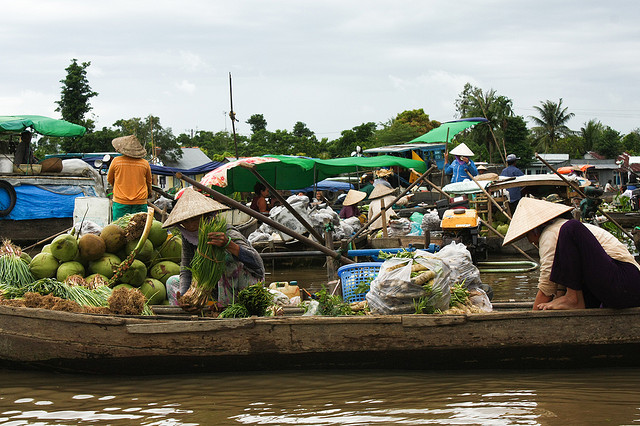

In [9]:
# train_caption will be the input of nlp module
# img_name_vector will be preprocessed and used as the input of image module
train_captions=[]
img_name_vector=[]

# get caption from image_path_to_caption and put it into the train_captions
for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    train_captions.extend(caption_list)
    img_name_vector.extend([image_path]*len(caption_list))

print(train_captions[:10])
print(img_name_vector[:10])
print(train_captions[0])
Image.open(img_name_vector[0])

### Preprocess the images using InceptionV3

In [10]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299,299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

### Initialize InceptionV3 and load the pretrained Imagenet weights

In [11]:
# Load Inception V3 model with out top layers
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
# create model using kera functional api
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

### Caching the featuers extracted from InceptionV3

In [12]:
# Get unique images
encode_train = sorted(set(img_name_vector))

# change batch_size according to your system configuration
# define batch dataset for image model
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

for img, path in image_dataset:
    # pass batched image into feature extraction model to get features
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
    
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        # save image_feature with name COCO_train2014_<id>.jpg.npy
        np.save(path_of_feature, bf.numpy())

### Preprocess and tokenize the captions

In [13]:
# Find the maxmium length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [14]:
# Choose the top 5000 words from the vocabulary
# Tokenize train_captions
max_mem=5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_mem,
                                                  oov_token='<unk>',
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(train_captions)
train_seqs = tokenizer.texts_to_sequences(train_captions)
tokenizer.word_index['<pad>']=0
tokenizer.index_word[0] = ['<pad>']

# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(train_captions)

# Pad each vector to the max_lenth of the captions with 'post'
# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)

### Split data into training and tresting

In [15]:
img_to_cap_vector = collections.defaultdict(list)
for img,cap in zip(img_name_vector, cap_vector):
    img_to_cap_vector[img].append(cap)

img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train=[]
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    img_name_train.extend([imgt]*capt_len)
    cap_train.extend(img_to_cap_vector[imgt])

    
img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    img_name_val.extend([imgv]*capv_len)
    cap_val.extend(img_to_cap_vector[imgv])
    
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(24011, 24011, 6002, 6002)

Create a tf.data dataset for training

In [16]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = max_mem + 1
num_steps = len(img_name_train) // BATCH_SIZE

# Shape of the vector extracted from InceptionV3 is (64,2048)
# These two variables represent that vector shape
features_shape =2048
attention_features_shape=64

In [17]:
# Load the numpy files
def map_func(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor, cap

In [18]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
    map_func, [item1, item2], [tf.float32, tf.int32]),
    num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [19]:
class BahdanauAttention(tf.keras.Model):
    def __init__(self,units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
        
    def call (self, features, hidden):
        # featuers(CNN_encoder output) shape == (batch_size, 64, embedding_dim)
        
        # hidden shape == (batch_size, hidden_size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        
        # attention_hidden_layer shape == (batch_size, 64, units)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features)+self.W2(hidden_with_time_axis)))
        
        # score shape == (batch_size, 64, 1)
        # generate unnormalized score for each image feature
        score = self.V(attention_hidden_layer)
        
        # attention_weights shape == (batch_size, 64, 1)
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # context_vector shape after sum==(batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector, attention_weights

In [20]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it using pickle
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [21]:
class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.units)
        
    def call(self, x, features, hidden):
        # defining attention as a separate model
        context_vector, attention_weights = self.attention(features, hidden)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)

        # shape == (batch_size, max_length, hidden_size)
        x = self.fc1(output)

        # x shape == (batch_size * max_length, hidden_size)
        x = tf.reshape(x, (-1, x.shape[2]))

        # output shape == (batch_size * max_length, vocab)
        x = self.fc2(x)

        return x, state, attention_weights
    
    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [22]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

In [23]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

### Checkpoint

In [24]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [25]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    # restoring the latest checkpoint in checkpoint_path
    ckpt.restore(ckpt_manager.latest_checkpoint)

### Start training

In [26]:
# adding this in a separate cell because if you run the training cell
# many times, the loss_plot array will be reset
loss_plot = []

In [27]:
@tf.function
def train_step(img_tensor, target):
    loss = 0

    # initializing the hidden state for each batch
    # because the captions are not related from image to image
    hidden = decoder.reset_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, total_loss

In [28]:
EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(
                epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
        ckpt_manager.save()

    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                         total_loss/num_steps))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 5 Batch 0 Loss 2.1390
Epoch 5 Batch 100 Loss 0.9196
Epoch 5 Batch 200 Loss 0.8788
Epoch 5 Batch 300 Loss 0.8332
Epoch 5 Loss 0.941127
Time taken for 1 epoch 146.5892894268036 sec

Epoch 6 Batch 0 Loss 0.7258
Epoch 6 Batch 100 Loss 0.8067
Epoch 6 Batch 200 Loss 0.7225
Epoch 6 Batch 300 Loss 0.7222
Epoch 6 Loss 0.727654
Time taken for 1 epoch 55.15344548225403 sec

Epoch 7 Batch 0 Loss 0.6806
Epoch 7 Batch 100 Loss 0.7256
Epoch 7 Batch 200 Loss 0.6398
Epoch 7 Batch 300 Loss 0.6371
Epoch 7 Loss 0.649999
Time taken for 1 epoch 54.985482692718506 sec

Epoch 8 Batch 0 Loss 0.5827
Epoch 8 Batch 100 Loss 0.6017
Epoch 8 Batch 200 Loss 0.5489
Epoch 8 Batch 300 Loss 0.5678
Epoch 8 Loss 0.594260
Time taken for 1 epoch 55.354270696640015 sec

Epoch 9 Batch 0 Loss 0.5856
Epoch 9 Batch 100 Loss 0.5892
Epoch 9 Batch 200 Loss 0.5277
Epoch 9 Batch 300 Loss 0.5366
Epoch 9 Loss 0.547277
Time taken for 1 epoch 55.087886571884155 sec

Epoch 10 Batch 0 Loss 0.4888
Epoch 10 Batch 100 Loss 0.5055
Epoch 1

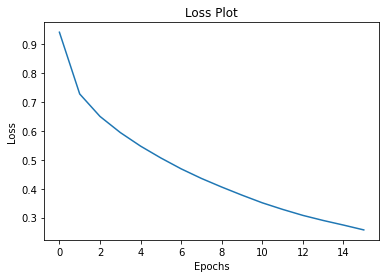

In [29]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [30]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [31]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result//2, len_result//2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

Real Caption: <start> a young boy on skateboard riding on a ramp <end>
Prediction Caption: a person is doing a red and a trick on it <end>


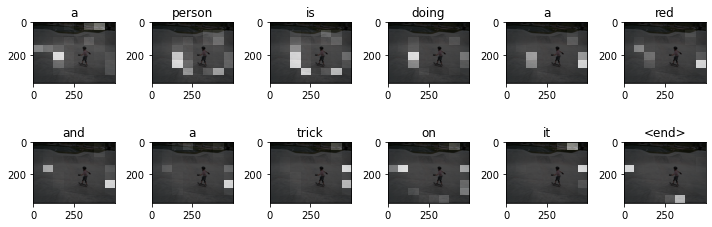

In [32]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print ('Real Caption:', real_caption)
print ('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)


Prediction Caption: a man riding a surfboard on a wave <end>


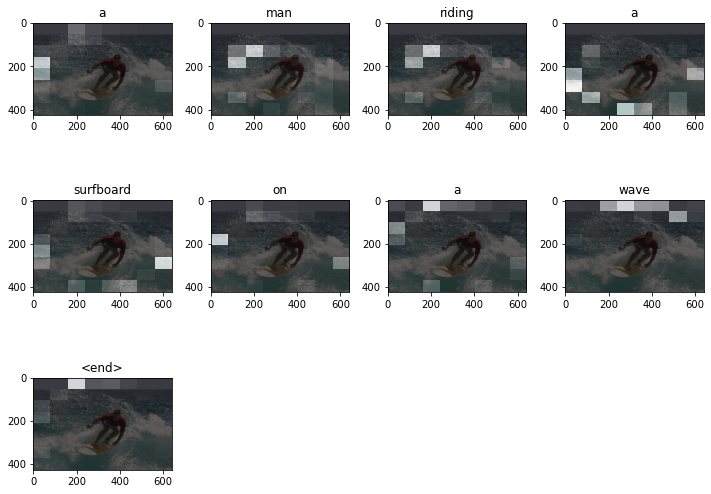

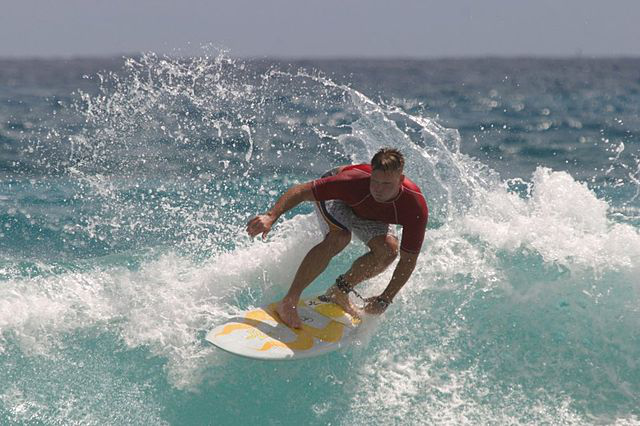

In [33]:
image_url = 'https://tensorflow.org/images/surf.jpg'
image_extension = image_url[-4:]
image_path = tf.keras.utils.get_file('image'+image_extension,
                                     origin=image_url)

result, attention_plot = evaluate(image_path)
print ('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
# opening the image
Image.open(image_path)

Prediction Caption: this is a red dinner is wrapped in a slice <end>


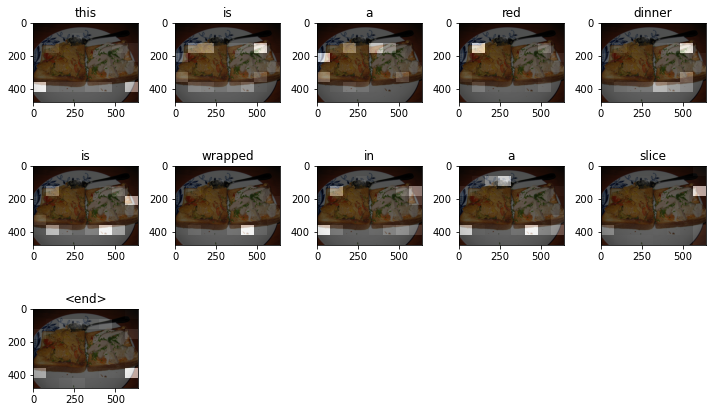

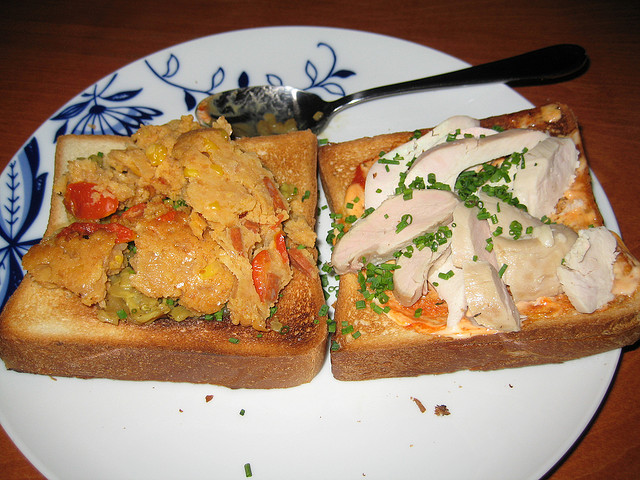

In [41]:
image_path ='train2014/COCO_train2014_000000292001.jpg'
result, attention_plot = evaluate(image_path)
print ('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
# opening the image
Image.open(image_path)

In [37]:
!ls train2014

COCO_train2014_000000000009.jpg      COCO_train2014_000000291788.jpg
COCO_train2014_000000000025.jpg      COCO_train2014_000000291797.jpg
COCO_train2014_000000000030.jpg      COCO_train2014_000000291822.jpg
COCO_train2014_000000000034.jpg      COCO_train2014_000000291825.jpg
COCO_train2014_000000000034.jpg.npy  COCO_train2014_000000291827.jpg
COCO_train2014_000000000036.jpg      COCO_train2014_000000291827.jpg.npy
COCO_train2014_000000000036.jpg.npy  COCO_train2014_000000291839.jpg
COCO_train2014_000000000049.jpg      COCO_train2014_000000291841.jpg
COCO_train2014_000000000061.jpg      COCO_train2014_000000291854.jpg
COCO_train2014_000000000064.jpg      COCO_train2014_000000291855.jpg
COCO_train2014_000000000064.jpg.npy  COCO_train2014_000000291865.jpg
COCO_train2014_000000000071.jpg      COCO_train2014_000000291868.jpg
COCO_train2014_000000000072.jpg      COCO_train2014_000000291873.jpg
COCO_train2014_000000000077.jpg      COCO_train2014_000000291873.jpg.npy
COCO_train2014_00000000007

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

